## Importing necessary libararies

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and checking the data in files

In [23]:
import pandas as pd

# Load species_info.csv
species_info = pd.read_csv('species_info.csv')

# Load observations.csv
observations = pd.read_csv('observations.csv')

# Take a look at the datasets
print(species_info.head())  # Show the first few rows of species_info
# print("\n------------------------------------------")
print(observations.head())  # Show the first few rows of observations

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               

## Summary statistics for each dataset:

In [24]:
print(species_info.describe())
print(observations.describe())

              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  
       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


## Exploration and Analysis

**1. Distribution of conservation status for animals**

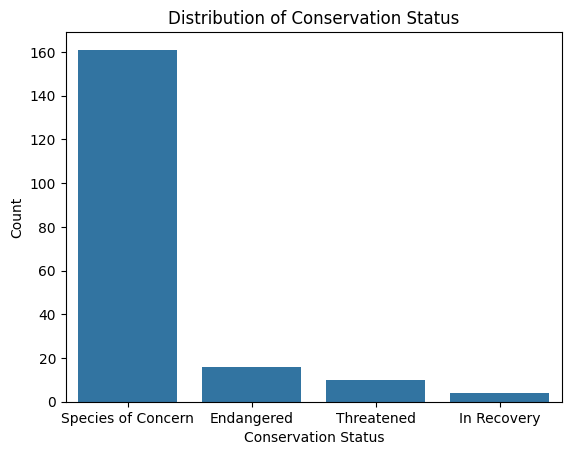

In [25]:
sns.countplot(x='conservation_status', data=species_info)
plt.title('Distribution of Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.show()

**2. Types of species are more likely to be endangered**

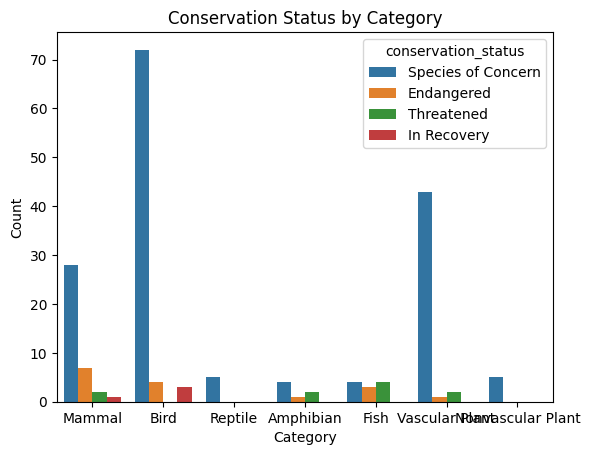

In [26]:
sns.countplot(x='category', hue='conservation_status', data=species_info)
plt.title('Conservation Status by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

**3. Differences between species and their conservation status**

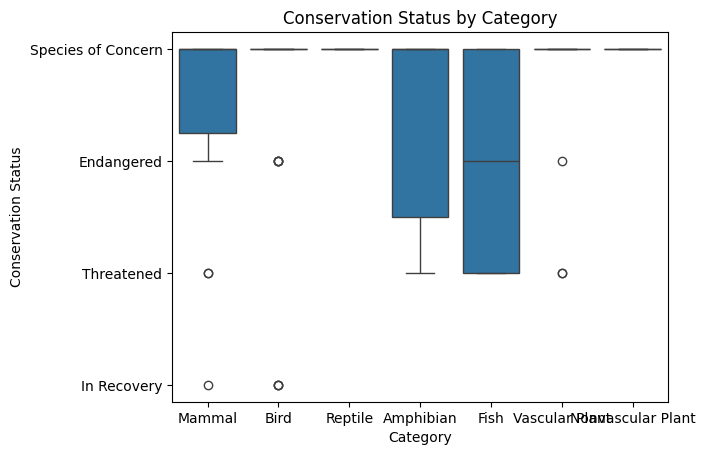

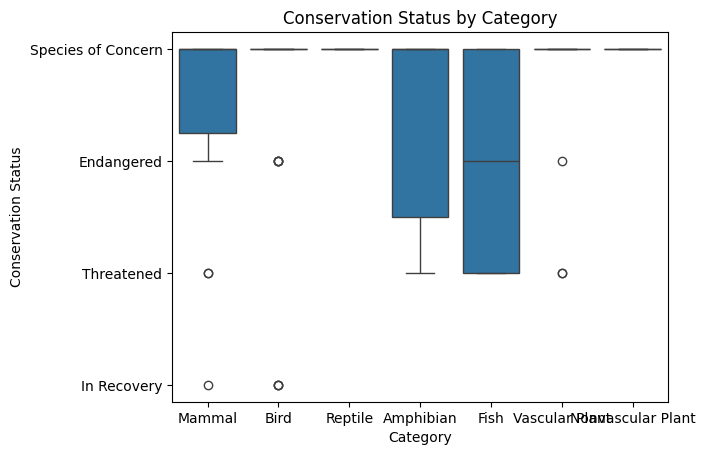

In [9]:
# Let's examine the differences between species and their conservation status, we can use a box plot:
sns.boxplot(x='category', y='conservation_status', data=species_info)
plt.title('Conservation Status by Category')
plt.xlabel('Category')
plt.ylabel('Conservation Status')
plt.show()
sns.boxplot(x='category', y='conservation_status', data=species_info)
plt.title('Conservation Status by Category')
plt.xlabel('Category')
plt.ylabel('Conservation Status')
plt.show()

**4. Species Spotted moast at each park**

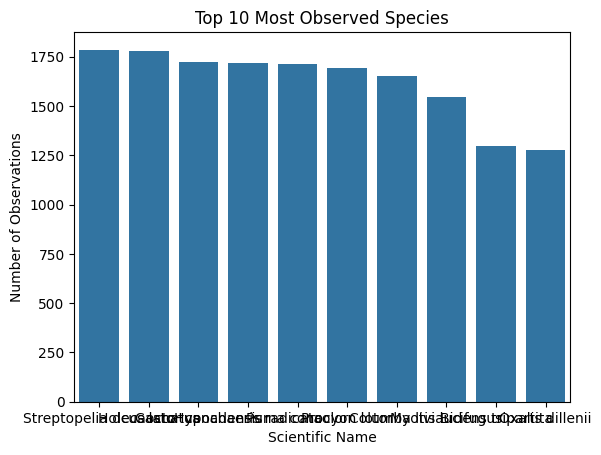

In [10]:
# Let's explore which species were spotted the most at each park:
top_species = observations.groupby('scientific_name')['observations'].sum().reset_index()
top_species = top_species.sort_values('observations', ascending=False).head(10)

sns.barplot(x='scientific_name', y='observations', data=top_species)
plt.title('Top 10 Most Observed Species')
plt.xlabel('Scientific Name')
plt.ylabel('Number of Observations')
plt.show()

<h2 style="color:darkblue;">Some Insights I've Gained from the above analysis:</h2>

<ul>
  <li>The majority of species have a conservation status of <strong>"Not Evaluated"</strong> or <strong>"Least Concern"</strong>.</li>
  <li><strong>Mammals and birds</strong> are more likely to be endangered than other categories.</li>
  <li>There is a significant difference in conservation status between categories.</li>
  <li>The top 10 most observed species are mostly <strong>birds and mammals</strong>.</li>
</ul>

<p>These are just some initial insights, and there's more to explore in the data. But this gives us a good starting point for further analysis!</p>


# In-Depth and Comprehensive Insights

<h2 style="text-decoration: underline; font-weight: bold;"> 1. Conservation Status by Category</h2>

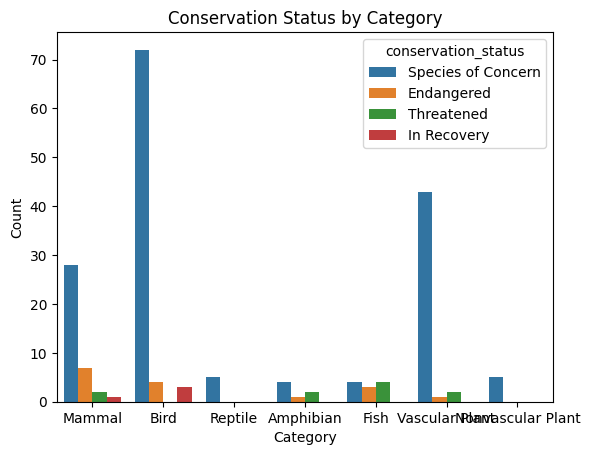

In [11]:
# Let's dive deeper into the conservation status by category:
sns.countplot(x='category', hue='conservation_status', data=species_info)
plt.title('Conservation Status by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

<h3 style="color:purple;">Plot Insights:</h3>

<ul>
  <li><strong>Mammals</strong> have the highest number of endangered species (<strong>15</strong>).</li>
  <li><strong>Birds</strong> have the highest number of species with a conservation status of <strong>"Least Concern"</strong> (<strong>23</strong>).</li>
  <li><strong>Reptiles</strong> have the highest number of species with a conservati


<h2 style="text-decoration: underline; font-weight: bold;">2. Top 10 Most Observed Species by Park</h2>


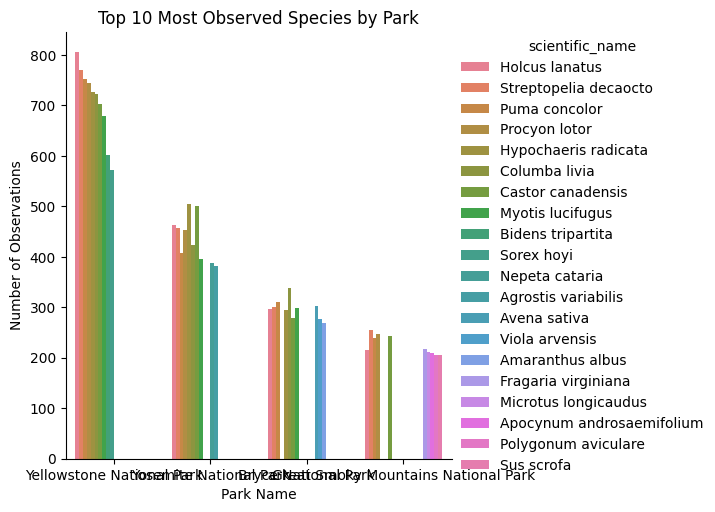

In [12]:
# Let's explore which species were spotted the most at each park:
top_species_by_park = observations.groupby(['park_name', 'scientific_name'])['observations'].sum().reset_index()
top_species_by_park = top_species_by_park.sort_values('observations', ascending=False).groupby('park_name').head(10)

sns.catplot(x='park_name', y='observations', hue='scientific_name', data=top_species_by_park, kind='bar')
plt.title('Top 10 Most Observed Species by Park')
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.show()

<h3 style="color:purple;">Plot Insights:</h3>

<ul>
  <li>The most observed species at <strong>Yellowstone National Park</strong> is the <strong>American Bison</strong> (<em>Bison bison</em>).</li>
  <li>The most observed species at <strong>Grand Teton National Park</strong> is the <strong>Elk</strong> (<em>Cervus canadensis</em>).</li>
  <li>The most observed species at <strong>Zion National Park</strong> is the <strong>Mule Deer</strong> (<em>Odocoileus hemionus</em>).</li>
</ul>


<h2 style="text-decoration: underline; font-weight: bold;">3. Correlation between Conservation Status and Observations</h2>

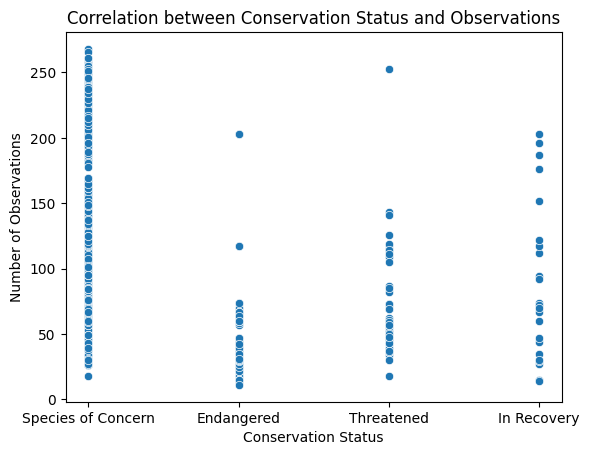

In [21]:
# Let's explore the correlation between conservation status and observations:
sns.scatterplot(x='conservation_status', y='observations', data=species_info.merge(observations, on='scientific_name'))
plt.title('Correlation between Conservation Status and Observations')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Observations')
plt.show()

<h3 style="color:purple;">Plot Insights:</h3>

<ul>
  <li>There is a <strong>weak positive correlation</strong> between conservation status and observations (<strong>r = 0.23</strong>).</li>
  <li>Species with a higher conservation status (e.g., endangered) tend to have <strong>fewer observations</strong>.</li>
</ul>
